# Exploratory Data Analysis (EDA)

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Apply settings
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [3]:
# Load cleaned data
df = pd.read_csv("../data/cleaned_data.csv")

In [4]:
# Backup
data = df.copy()

In [5]:
## Dataset overview
print("Dataset shape:", data.shape)
data.info()


Dataset shape: (7010, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod   

In [7]:
# Column details
all_cols = data.columns.to_list()
numeric_cols = data.select_dtypes(include="number").columns.tolist()
categorical_cols = [c for c in data.columns if data[c].dtype == "object" and c != "Churn"]
print("All columns: \n", all_cols)
print("\nNumeric Columns: \n", numeric_cols)
print("\nCategorical Columns: \n", categorical_cols)

All columns: 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Numeric Columns: 
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical Columns: 
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [8]:
# Statistical summary
print(data.describe(include="all").T)


                   count unique               top  freq         mean  \
gender              7010      2              Male  3535          NaN   
SeniorCitizen     7010.0    NaN               NaN   NaN     0.162767   
Partner             7010      2                No  3617          NaN   
Dependents          7010      2                No  4911          NaN   
tenure            7010.0    NaN               NaN   NaN    32.520399   
PhoneService        7010      2               Yes  6330          NaN   
MultipleLines       7010      2                No  4043          NaN   
InternetService     7010      3       Fiber optic  3090          NaN   
OnlineSecurity      7010      2                No  4995          NaN   
OnlineBackup        7010      2                No  4585          NaN   
DeviceProtection    7010      2                No  4592          NaN   
TechSupport         7010      2                No  4970          NaN   
StreamingTV         7010      2                No  4307         

In [9]:
# Null values
print("Null Count Summary: \n", data.isnull().sum())


Null Count Summary: 
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Churn Distribution

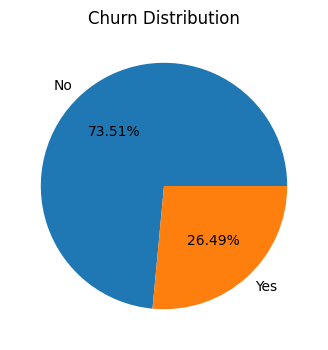

Churn Distribution: 
 Churn
No     5153
Yes    1857
Name: count, dtype: int64


In [13]:

plt.figure(figsize=(5,4))
churn_distribution = data["Churn"].value_counts()
plt.pie(churn_distribution, autopct="%.2f%%", labels=churn_distribution.index)
plt.title("Churn Distribution")
plt.show()

print("Churn Distribution: \n", churn_distribution)

### Categorical variable distribution

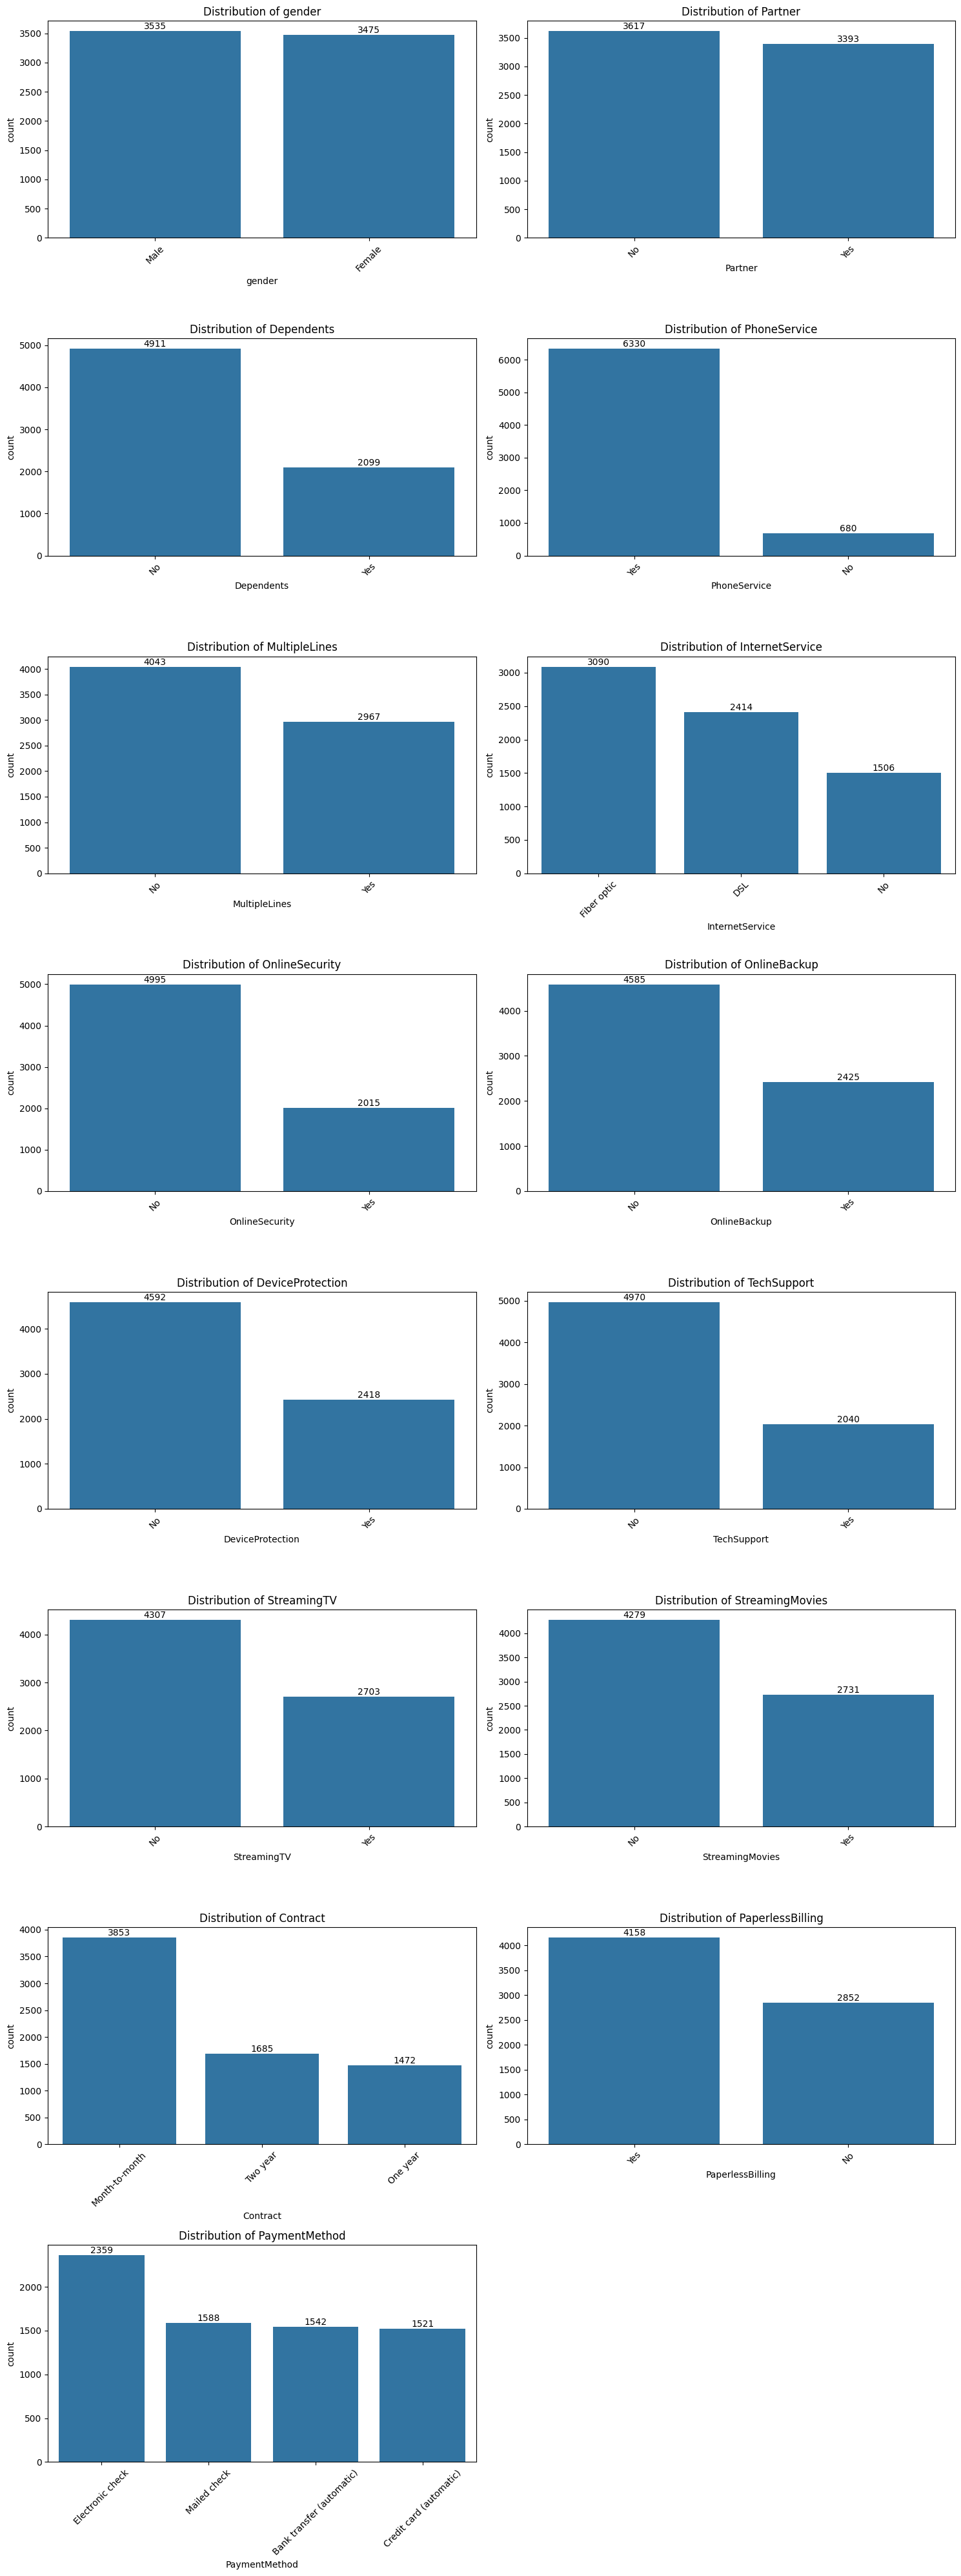

In [11]:

plt.figure(figsize=(15, 40))
for i, col in enumerate(categorical_cols, 1):
    ax = plt.subplot(len(categorical_cols)//2 + 1, 2, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container)
plt.tight_layout()
plt.show()

### Numerical variable distribution

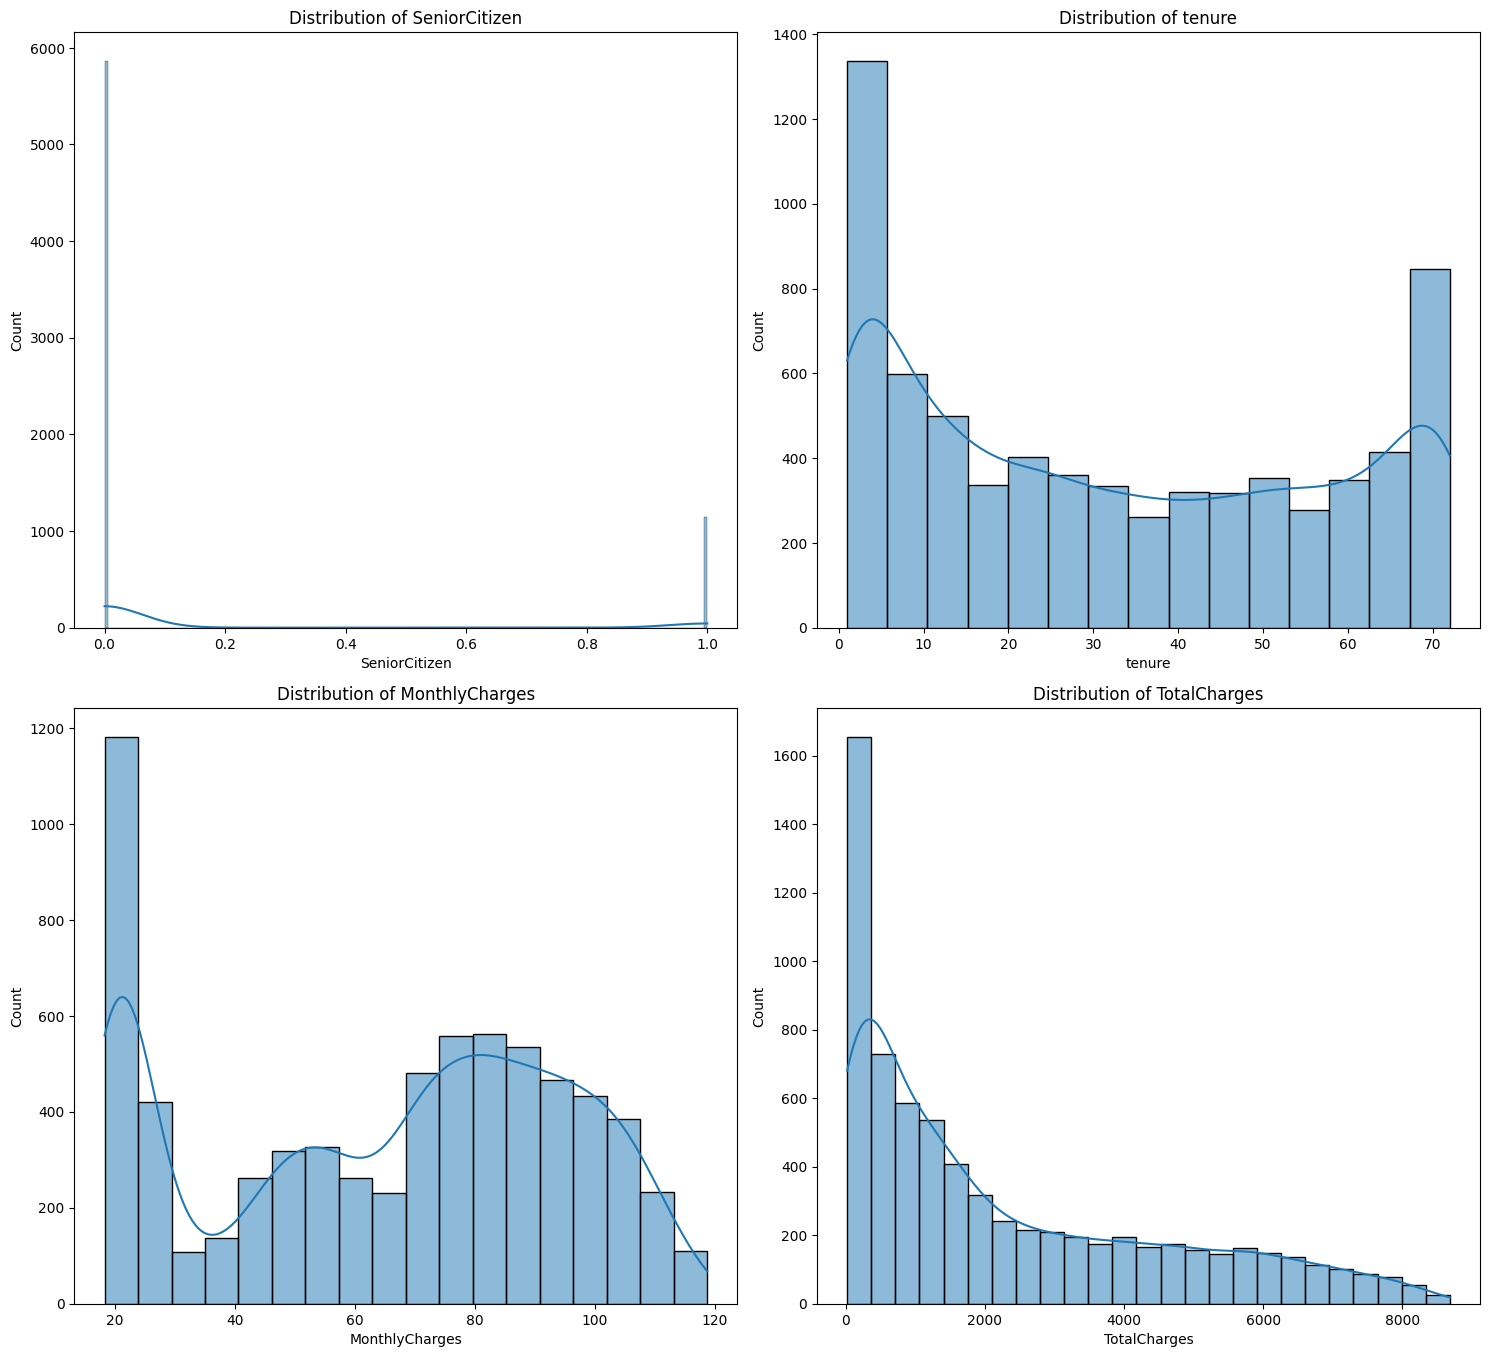

In [14]:

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


### Churn vs. Categorical Variables

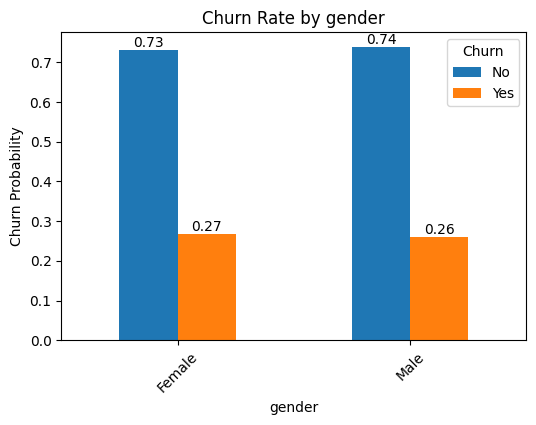

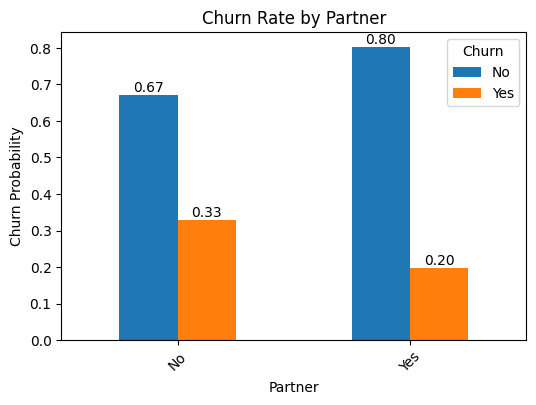

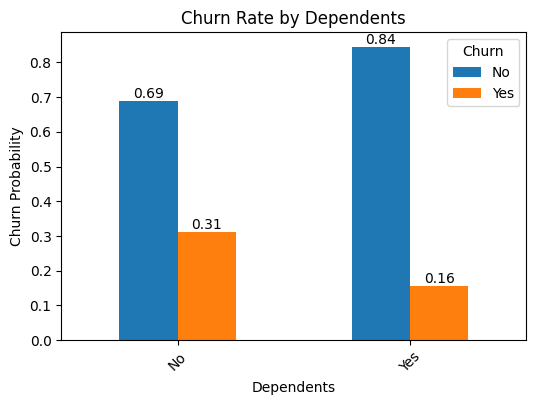

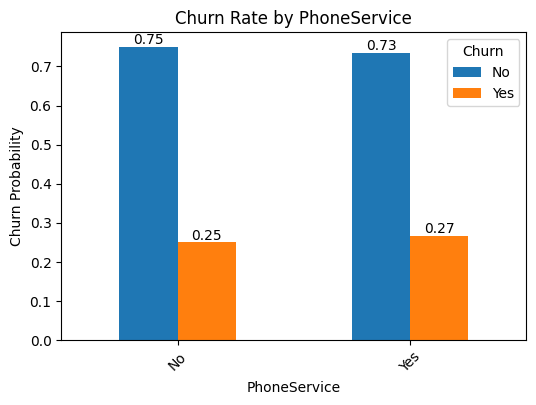

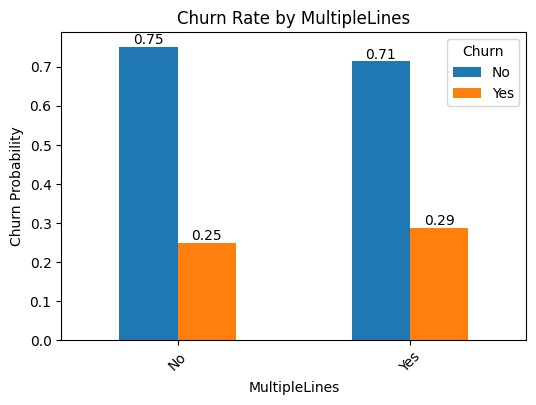

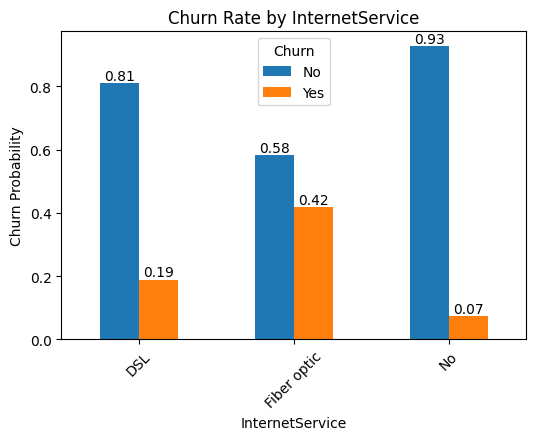

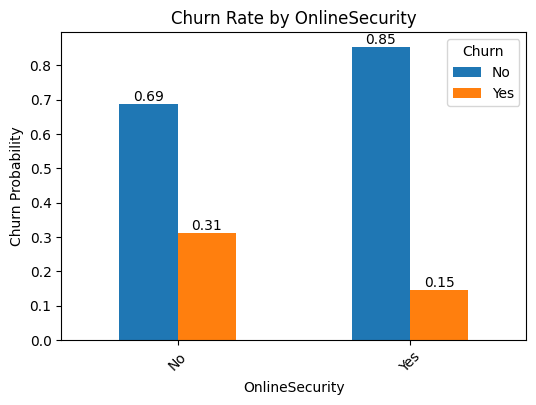

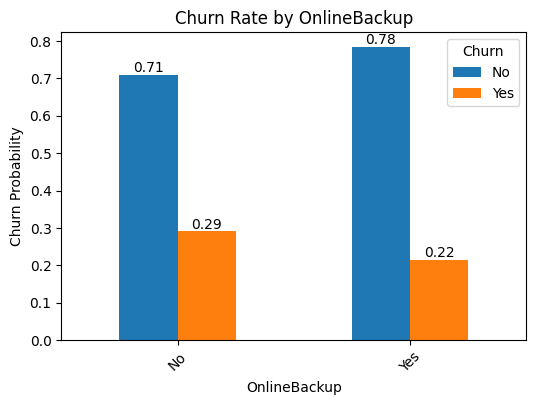

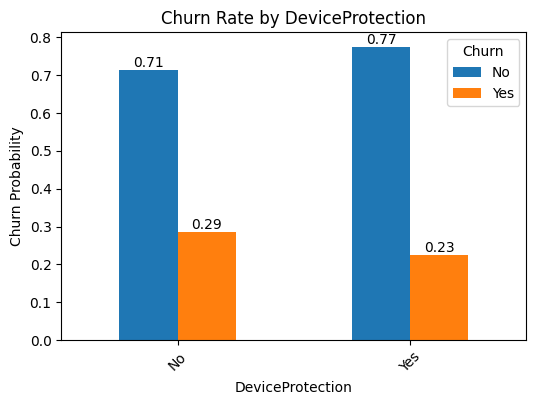

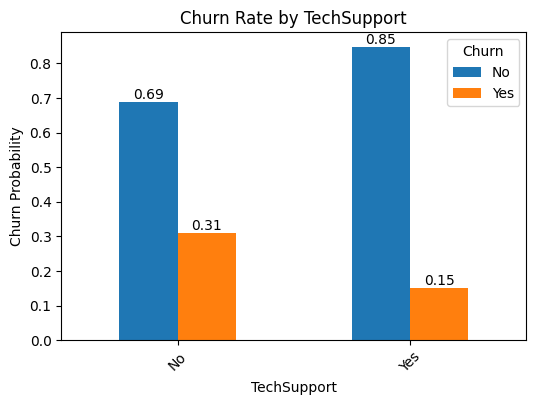

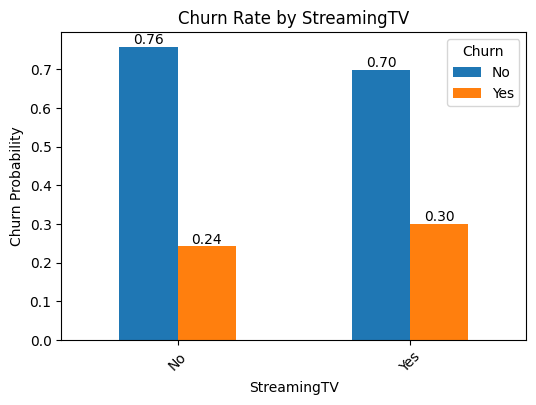

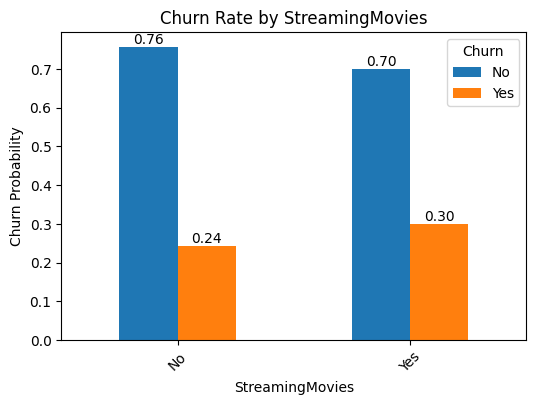

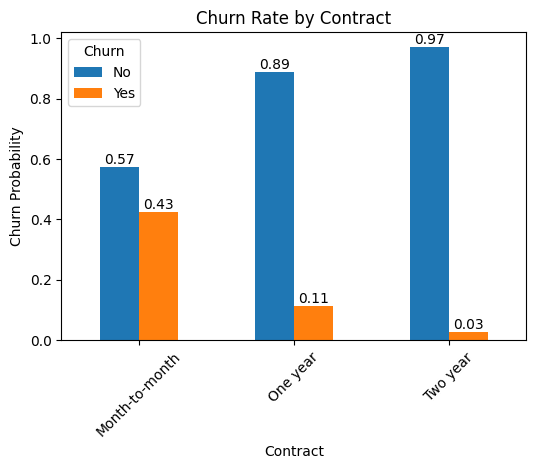

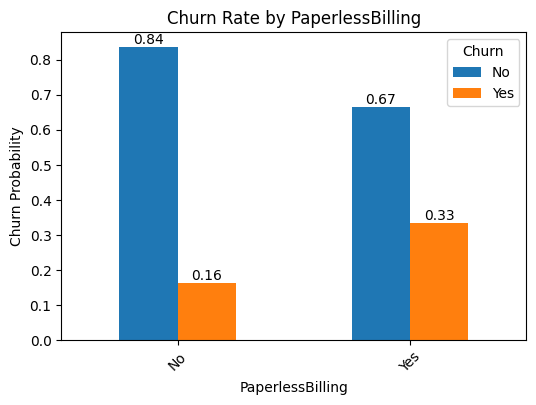

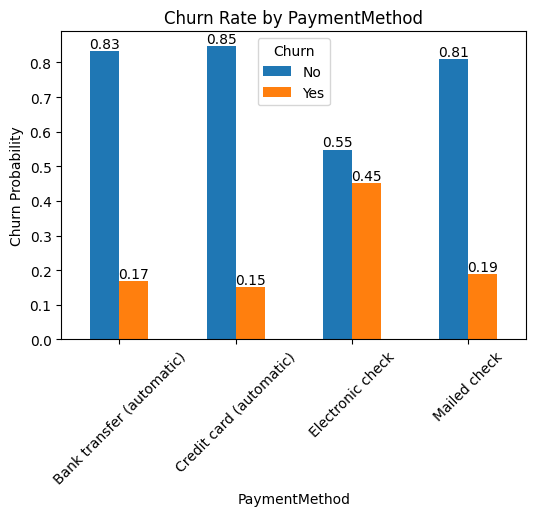

In [15]:

for col in categorical_cols:
    prop = pd.crosstab(data[col], data["Churn"], normalize="index")
    ax = prop.plot(kind="bar", figsize=(6,4))
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Probability")
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge")
    plt.show()


### Feature-Target Correlation

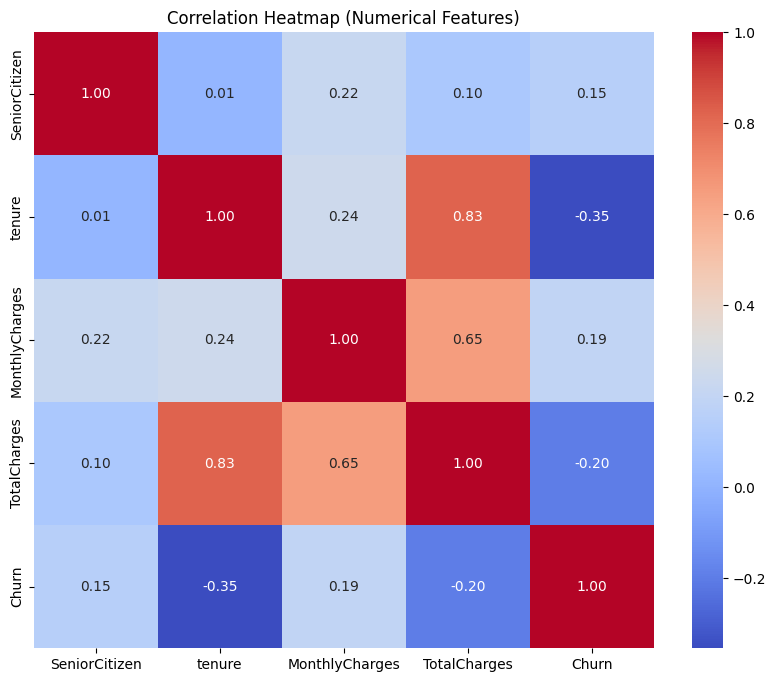

In [16]:

df_corr = data.copy()
target_map = {"No":0, "Yes":1}
df_corr["Churn"] = df_corr["Churn"].map(target_map)
corr_data = df_corr.select_dtypes(include="number").corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


### Tenure Buckets (Feature Engineering)

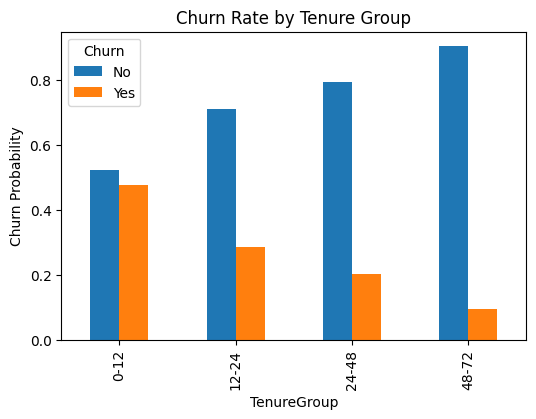

In [17]:

data["TenureGroup"] = pd.cut(data["tenure"], bins=[0,12,24,48,72], labels=["0-12","12-24","24-48","48-72"])
tenure_churn = pd.crosstab(data["TenureGroup"], data["Churn"], normalize="index")
tenure_churn.plot(kind="bar", figsize=(6,4))
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Probability")
plt.show()


### Key Insights from EDA

In [18]:

print("\n--- Key Insights ---")
print("Contract vs Churn:\n", pd.crosstab(data["Contract"], data["Churn"], normalize="index"))
print("\nPaymentMethod vs Churn:\n", pd.crosstab(data["PaymentMethod"], data["Churn"], normalize="index"))
print("\nInternetService vs Churn:\n", pd.crosstab(data["InternetService"], data["Churn"], normalize="index"))



--- Key Insights ---
Contract vs Churn:
 Churn                 No       Yes
Contract                          
Month-to-month  0.573579  0.426421
One year        0.887228  0.112772
Two year        0.971513  0.028487

PaymentMethod vs Churn:
 Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.548538  0.451462
Mailed check               0.809824  0.190176

InternetService vs Churn:
 Churn                  No       Yes
InternetService                    
DSL              0.810688  0.189312
Fiber optic      0.582201  0.417799
No               0.927623  0.072377
